In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report,confusion_matrix,roc_curve,roc_auc_score,auc
import seaborn as sns

# DATA PREPROCESSING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/loan_prediction_1.csv")

In [ ]:
data.shape

(614, 13)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data = data.drop('Loan_ID',axis=1) #dropping the Loan_ID column because it has nothing to do with loan approval prediction
data.isnull().sum() #looking at number of missing data points

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#filling the missing values with the most occured value in that column
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

#filling the missing vales in LoanAmount column with mean because using mode here is not that valid
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

# print(data['Married'].mode())
# print(data['LoanAmount'].mean())

In [ ]:
import plotly.express as px

fig1 = px.box(
                data,
                x='ApplicantIncome',
                y='Loan_Status',
                color="Loan_Status",
                title='ApplicantIncome vs Loan_Status'
              )
fig1.show()
#In the below output we sure can see that we have outliers





> **We could see that it is positive skewed because the median is located towards the left side of the box and whisker at right side looks bigger**



In [ ]:
data.shape

(614, 12)

In [ ]:
#Calculating the IQR (InterQuartile Range)
Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)
IQR = Q3-Q1

#finding the lower bound and upper bound so we can remove the outliers which does not exist between them
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

#removing the outliers which are lower than lower bound and greater than upper bound
data = data[(data['ApplicantIncome'] >= lower_limit) & (data['ApplicantIncome'] <= upper_limit)]

In [ ]:
data.shape #records are decreased to 564 from 614 which means we had 50 outliers in 'ApplicantIncome' feature

(564, 12)

In [ ]:
fig2 = px.box(
                data,
                x='CoapplicantIncome',
                y='Loan_Status',
                color="Loan_Status",
                title='CoapplicantIncome vs Loan_Status'
              )
fig2.show()





> **We could see that it is positive skewed because the median is located towards the left side of the box and whisker at right side looks bigger**



In [ ]:
data.shape

(564, 12)

In [ ]:
#Calculating the IQR (InterQuartile Range)
Q1 = data['CoapplicantIncome'].quantile(0.25)
Q3 = data['CoapplicantIncome'].quantile(0.75)
IQR = Q3-Q1

#finding the lower bound and upper bound so we can remove the outliers which does not exist between them
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

#removing the outliers which are lower than lower bound and greater than upper bound
data = data[(data['CoapplicantIncome'] >= lower_limit) & (data['CoapplicantIncome'] <= upper_limit)]

In [ ]:
data.shape #records are decreased to 548 from 564 which means we had 16 outliers in 'CoapplicantIncome' feature

(548, 12)

In [ ]:
fig3 = px.box(
                data,
                x = 'LoanAmount',
                y = 'Loan_Status',
                color="Loan_Status",
                title = 'LoanAmount vs Loan_Status'
)
fig3.show()





> **We could see that it looks normally distributed the median is located almost middle of the box and both the whiskers looks to have same length**



In [ ]:
data.shape

(548, 12)

In [ ]:
#Calculating the IQR (InterQuartile Range)
Q1 = data['LoanAmount'].quantile(0.25)
Q3 = data['LoanAmount'].quantile(0.75)
IQR = Q3-Q1

#finding the lower bound and upper bound so we can remove the outliers which does not exist between them
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

#removing the outliers which are lower than lower bound and greater than upper bound
data = data[(data['LoanAmount'] >= lower_limit) & (data['LoanAmount'] <= upper_limit)]

In [ ]:
data.shape #records are decreased to 520 from 548 which means we had 28 outliers in 'LoanAmount' feature

(520, 12)

In [ ]:
fig4 = px.box(
                data,
                x = 'Loan_Amount_Term',
                y = 'Loan_Status',
                color="Loan_Status",
                title = 'Loan_Amount_Term vs Loan_Status'
)
fig4.show()



> **This happened because most of the people have same loan amount term but its totally fine having the loan amount terms that are here**



In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


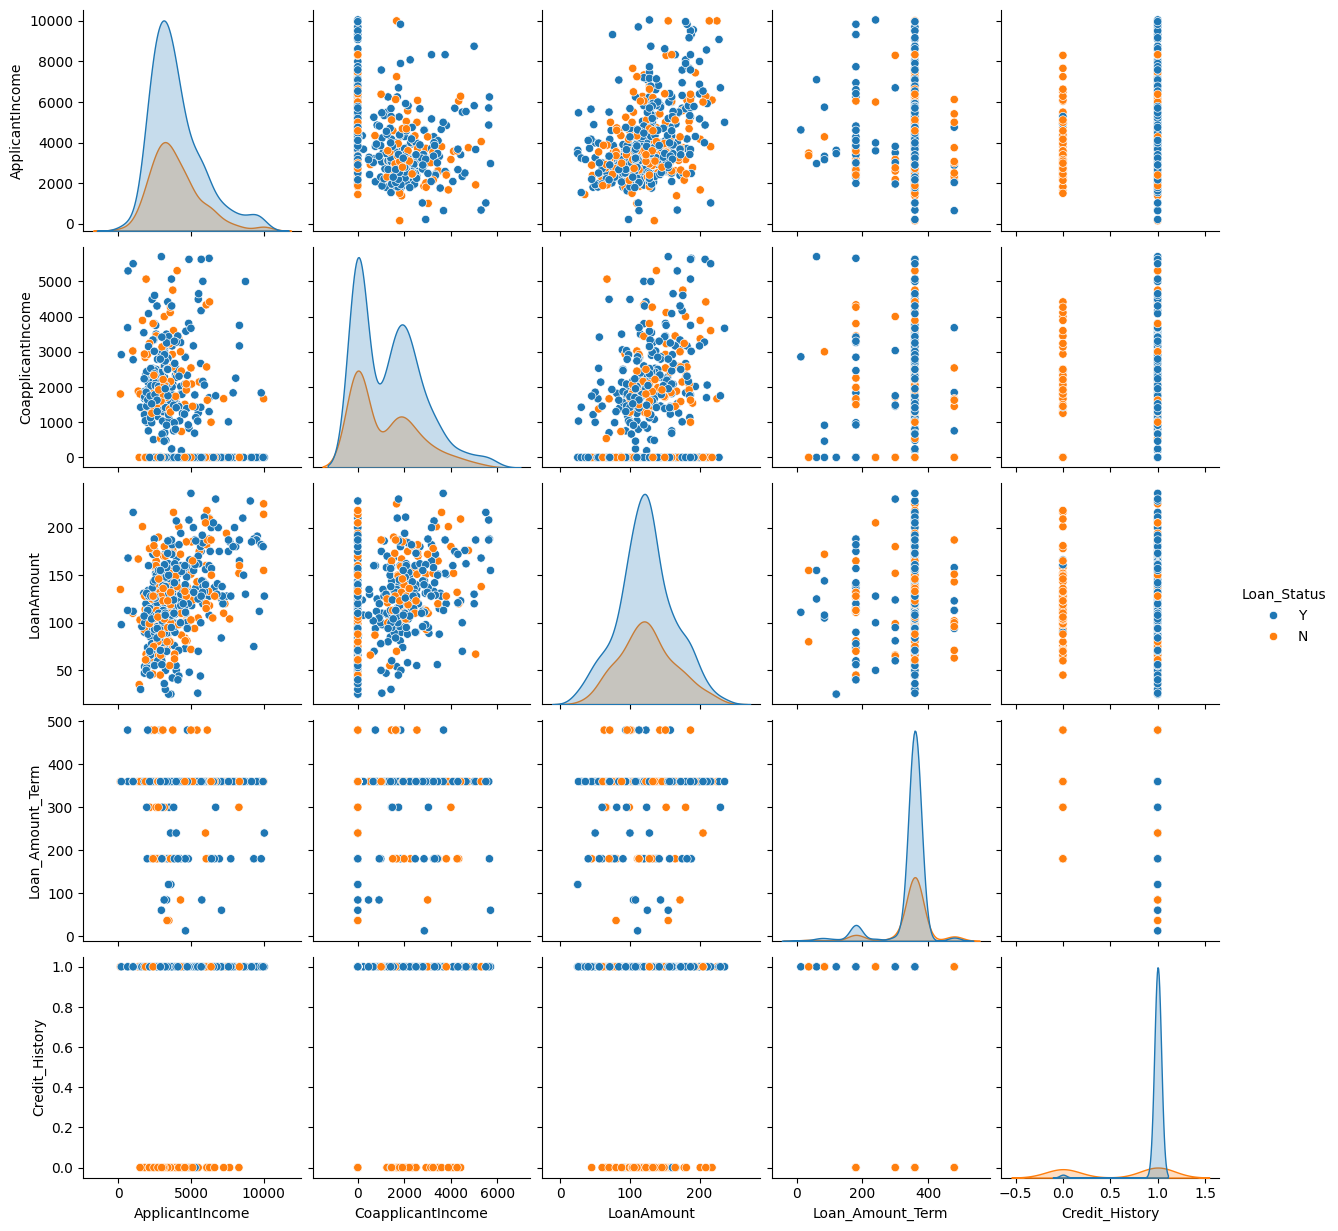

In [ ]:
sns.pairplot(data, diag_kind='kde', hue='Loan_Status')

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = data[column].unique()
    print(f'Unique values in column "{column}": {unique_values}')

Unique values in column "Gender": ['Male' 'Female']
Unique values in column "Married": ['No' 'Yes']
Unique values in column "Dependents": ['0' '1' '3+' '2']
Unique values in column "Education": ['Graduate' 'Not Graduate']
Unique values in column "Self_Employed": ['No' 'Yes']
Unique values in column "Property_Area": ['Urban' 'Rural' 'Semiurban']
Unique values in column "Loan_Status": ['Y' 'N']


In [ ]:
categorical_cols = ['Gender','Married','Education','Self_Employed','Property_Area']
data = pd.get_dummies(data,columns = categorical_cols)
print(data.head())
print(data.shape)

  Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0             5849                0.0       128.0   
1          1             4583             1508.0       128.0   
2          0             3000                0.0        66.0   
3          0             2583             2358.0       120.0   
4          0             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History Loan_Status  Gender_Female  Gender_Male  \
0             360.0             1.0           Y          False         True   
1             360.0             1.0           N          False         True   
2             360.0             1.0           Y          False         True   
3             360.0             1.0           Y          False         True   
4             360.0             1.0           Y          False         True   

   Married_No  Married_Yes  Education_Graduate  Education_Not Graduate  \
0        True        False                True                   F

In [ ]:
label_encoder = LabelEncoder()
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'0': 0, '1': 1, '2': 2, '3+': 3}


In [ ]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,Y,False,True,True,False,True,False,True,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,N,False,True,False,True,True,False,True,False,True,False,False
2,0,3000,0.0,66.0,360.0,1.0,Y,False,True,False,True,True,False,False,True,False,False,True
3,0,2583,2358.0,120.0,360.0,1.0,Y,False,True,False,True,False,True,True,False,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,True,False,True,False,False,False,True


In [ ]:
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'N': 0, 'Y': 1}


In [ ]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,1,False,True,True,False,True,False,True,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,0,False,True,False,True,True,False,True,False,True,False,False
2,0,3000,0.0,66.0,360.0,1.0,1,False,True,False,True,True,False,False,True,False,False,True
3,0,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,False,True,True,False,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,True,False,True,False,False,False,True


In [ ]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [ ]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,False,True,True,False,True,False,True,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,True,False,True,False,True,False,False
2,0,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,False,False,True,False,False,True
3,0,2583,2358.0,120.0,360.0,1.0,False,True,False,True,False,True,True,False,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,False,True,False,False,False,True


In [ ]:
X.shape

(520, 17)

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [ ]:
y.shape

(520,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

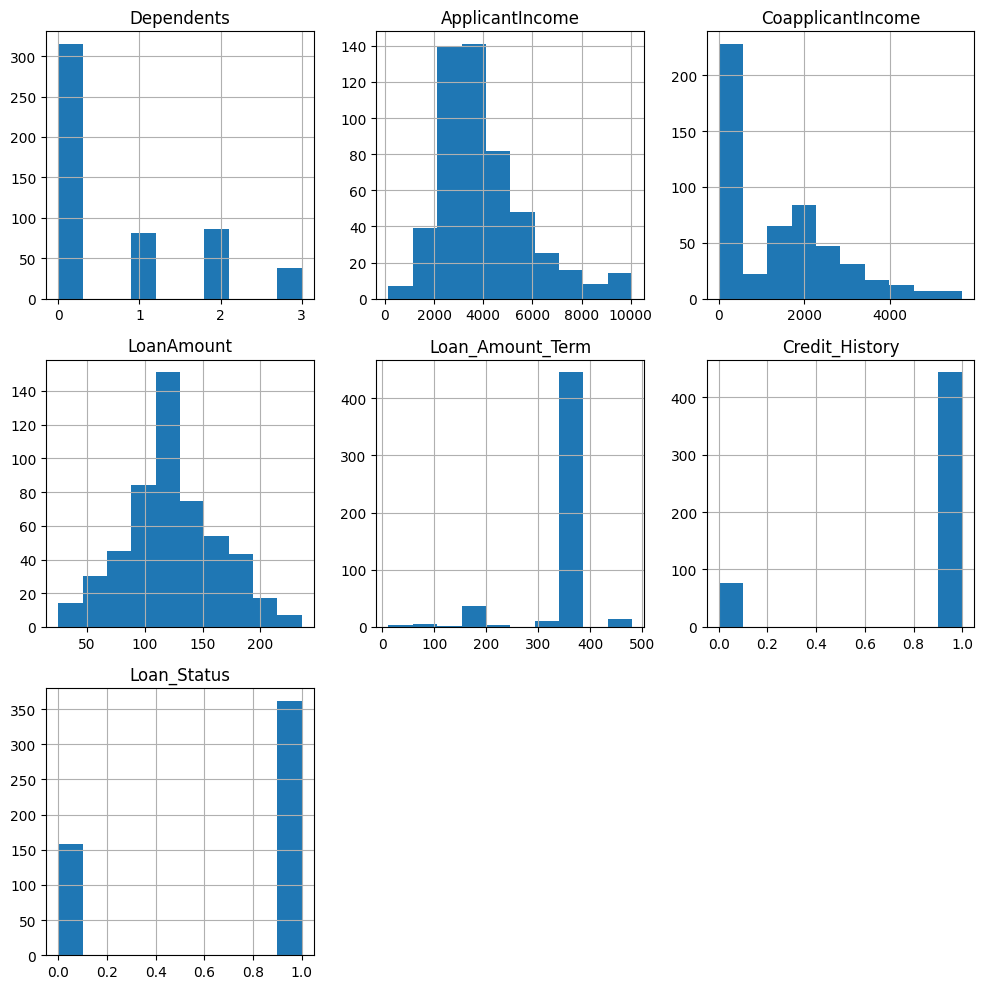

In [ ]:
data.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [ ]:
data['Dependents'].unique()

array([0, 1, 3, 2])

In [ ]:
#standardisation preserves the relationship between the data points
scaler = StandardScaler()
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
64,0,0.111370,-0.968831,-0.193032,0.275515,0.0,True,False,True,False,True,False,True,False,False,True,False
589,2,-0.700233,-0.968831,-0.451913,0.275515,0.0,False,True,False,True,True,False,False,True,False,True,False
399,0,-1.391222,0.329861,-0.529577,0.275515,0.0,True,False,True,False,True,False,True,False,False,True,False
518,0,0.402758,0.412833,1.593245,0.275515,1.0,False,True,True,False,True,False,True,False,False,True,False
470,1,-0.292177,0.531158,0.997819,0.275515,1.0,False,True,False,True,True,False,False,True,False,True,False


In [ ]:
X_train.shape

(390, 17)

# SVM

In [ ]:
svm = SVC(random_state=42,probability=True)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
y_pred = svm.predict(X_test)
print(y_pred)

[1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


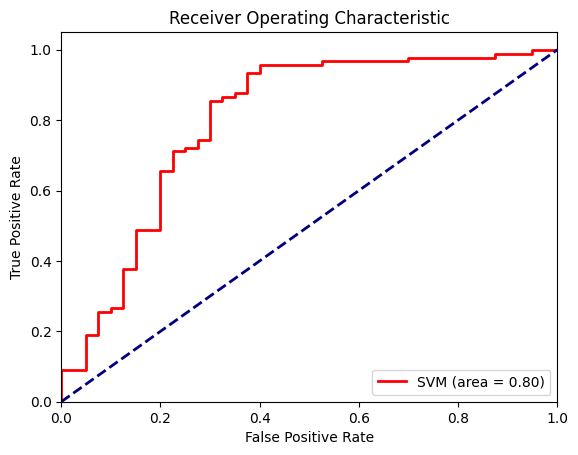

In [ ]:
y_score_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm,pos_label=1)
plt.figure()
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (area = {roc_auc_svm:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8077
Precision: 0.7982
Recall: 0.9667
F1 Score: 0.8744


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm, X, y, cv=cv, scoring='accuracy')
print(f"{scores.mean():.4f} (accuracy)")

0.6962 (accuracy)


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
'''
TN FP
FN TP
'''

'\nTN FP\nFN TP\n'

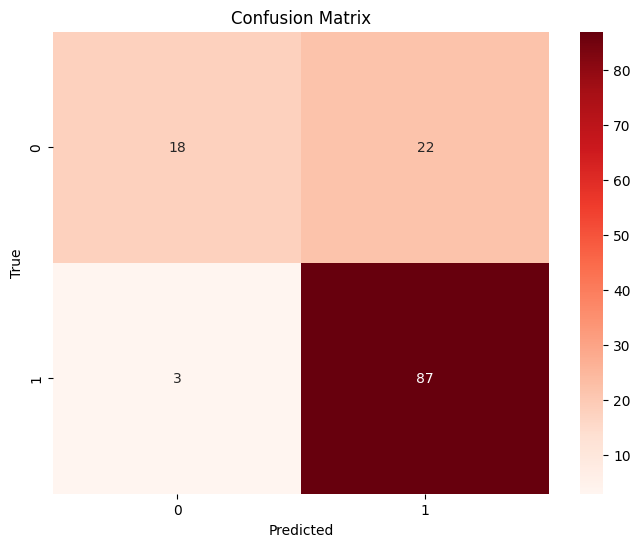

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"Total number of correct predictions = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")

Total number of correct predictions = 105 out of 130


# LOGISTIC REGRESSION

In [ ]:
lg = LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto',max_iter=500)

lg.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=42)

In [ ]:
y_pred = lg.predict(X_test)

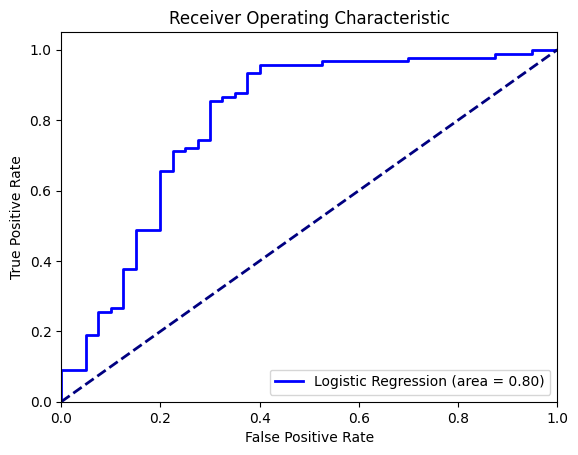

In [ ]:
y_score_lg = svm.predict_proba(X_test)[:, 1]
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_score_svm,pos_label=1)
plt.figure()
roc_auc_lg = auc(fpr_lg, tpr_lg)
plt.plot(fpr_lg, tpr_lg, color='blue', lw=2, label=f'Logistic Regression (area = {roc_auc_lg:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8077
Precision: 0.7982
Recall: 0.9667
F1 Score: 0.8744


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18 22]
 [ 3 87]]


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lg, X, y, cv=cv, scoring='accuracy')
print(f"{scores.mean():.4f}  (accuracy)")

0.8269  (accuracy)


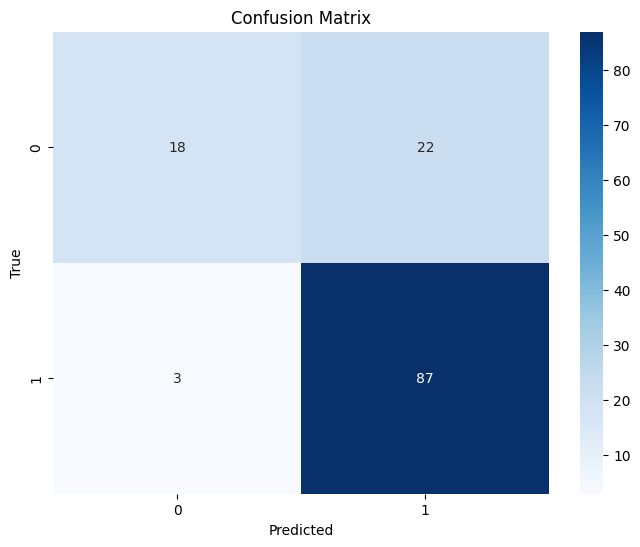

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"Total number of correct predictions  = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")

Total number of correct predictions  = 105 out of 130


# RANDOM FOREST

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

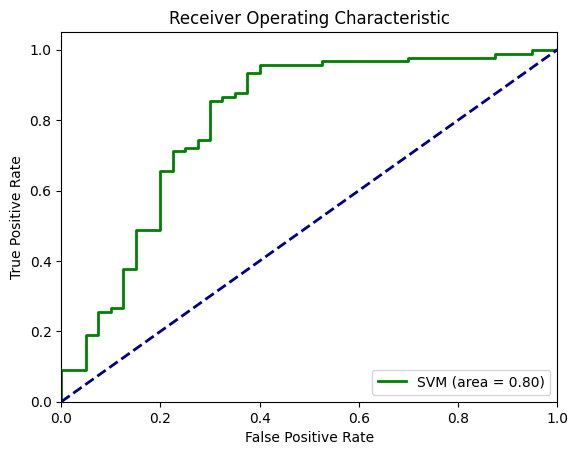

In [ ]:
y_score_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_svm,pos_label=1)
plt.figure()
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'SVM (area = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8077
Precision: 0.8095
Recall: 0.9444
F1 Score: 0.8718


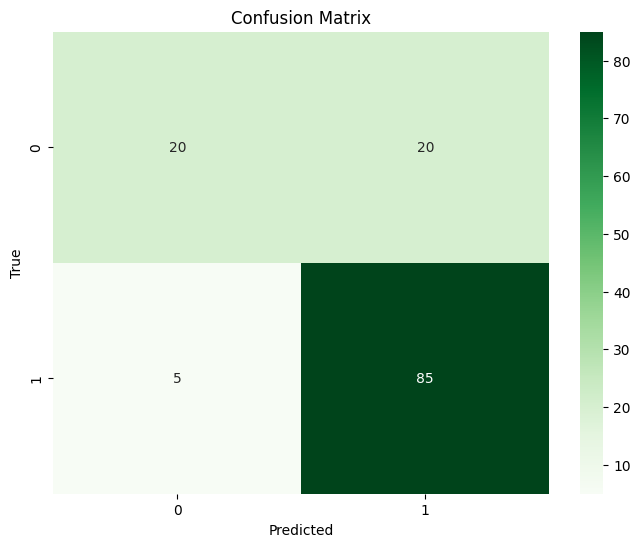

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"Total number of correct predictions = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")

Total number of correct predictions = 105 out of 130


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
print(f"{scores.mean():.4f} (accuracy)")

0.8000 (accuracy)


#KNN

In [ ]:
metrics = {'precision': [], 'recall': [], 'f1-score': [], 'accuracy':[]}
k_values = [1,3,5,7,9,11,12,13,15]
for i in k_values:
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Total number of correct predictions when n_neighbors is set to {i} = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")
    # print(cm)
    cr = classification_report(y_test, y_pred,output_dict = True)
    weighted_avg_metrics = cr['weighted avg']
    metrics['precision'].append(weighted_avg_metrics['precision'])
    metrics['recall'].append(weighted_avg_metrics['recall'])
    metrics['f1-score'].append(weighted_avg_metrics['f1-score'])
    acc = accuracy_score(y_test, y_pred)
    metrics['accuracy'].append(acc)

Total number of correct predictions when n_neighbors is set to 1 = 96 out of 130
Total number of correct predictions when n_neighbors is set to 3 = 89 out of 130
Total number of correct predictions when n_neighbors is set to 5 = 91 out of 130
Total number of correct predictions when n_neighbors is set to 7 = 91 out of 130
Total number of correct predictions when n_neighbors is set to 9 = 90 out of 130
Total number of correct predictions when n_neighbors is set to 11 = 87 out of 130
Total number of correct predictions when n_neighbors is set to 12 = 90 out of 130
Total number of correct predictions when n_neighbors is set to 13 = 90 out of 130
Total number of correct predictions when n_neighbors is set to 15 = 91 out of 130


In [ ]:
for i in metrics:
  print(f"{i} : {metrics[i]}")

precision : [0.7266483516483516, 0.6447094868147499, 0.663768115942029, 0.6629935720844812, 0.6373626373626374, 0.5378461538461538, 0.6418663303909206, 0.6395781637717123, 0.6902887139107612]
recall : [0.7384615384615385, 0.6846153846153846, 0.7, 0.7, 0.6923076923076923, 0.6692307692307692, 0.6923076923076923, 0.6923076923076923, 0.7]
f1-score : [0.7294962720494634, 0.6449629298098815, 0.6501108647450111, 0.6271399555082697, 0.5920745920745921, 0.5675213675213675, 0.6129656507014998, 0.6030381645985058, 0.5965062694244989]
accuracy : [0.7384615384615385, 0.6846153846153846, 0.7, 0.7, 0.6923076923076923, 0.6692307692307692, 0.6923076923076923, 0.6923076923076923, 0.7]


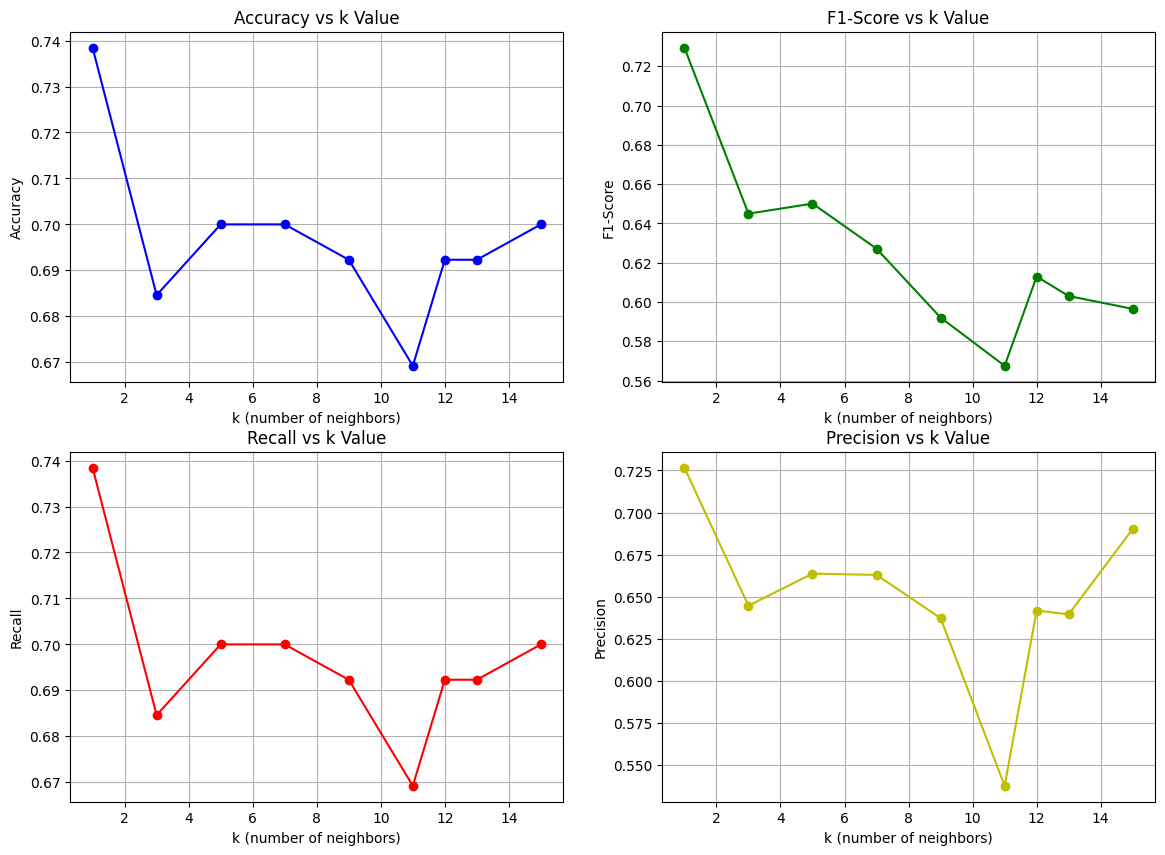

In [ ]:
# Accuracy vs k value
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.plot(k_values, metrics['accuracy'],marker='o',color='b')
plt.title('Accuracy vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)

# f1-score vs k value
plt.subplot(2, 2, 2)
plt.plot(k_values, metrics['f1-score'], marker='o',color='g')
plt.title('F1-Score vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('F1-Score')
plt.grid(True)

# Recall vs k value
plt.subplot(2, 2, 3)
plt.plot(k_values, metrics['recall'], marker='o',color='r')
plt.title('Recall vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Recall')
plt.grid(True)

# Precision vs k value
plt.subplot(2, 2, 4)
plt.plot(k_values, metrics['precision'], marker='o',color='y')
plt.title('Precision vs k Value')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Precision')
plt.grid(True)

plt.show()

#FORWARD SELECTION


In [ ]:
new_svm = SVC(random_state=42)
new_knn = KNeighborsClassifier(n_neighbors=1)
new_lg = LogisticRegression(random_state=42)
new_tree = RandomForestClassifier(random_state=42)
models = [new_svm,new_knn,new_lg,new_tree]
names = ['Simple Vector Machine','K Nearest Neighbors','Logistic Regression','Random Forest']

for i,model in enumerate(models):
  remaining_features = list(X_train.columns)
  the_best_features = []
  selected_features = []
  while remaining_features:
    scores_and_features = []
    for feature in remaining_features:
      features_to_try = selected_features + [feature]
      train_subset = X_train[features_to_try]
      score = np.mean(cross_val_score(model,train_subset,y_train,cv=KFold(n_splits=5, shuffle=True, random_state=42),scoring='accuracy'))
      scores_and_features.append((score,feature))

    scores_and_features.sort(reverse=True)
    best_score,best_feature = scores_and_features[0]

    if the_best_features and best_score <= the_best_features[-1][0]:
      break
    remaining_features.remove(best_feature)
    selected_features.append(best_feature)
    the_best_features.append((best_score,best_feature))

  best_feature_names = [feature for score,feature in the_best_features]
  print(f'{names[i]} : Features {best_feature_names}\n{the_best_features}\n\n')

Simple Vector Machine : Features ['Credit_History']
[(0.8307692307692308, 'Credit_History')]


K Nearest Neighbors : Features ['Education_Graduate', 'Credit_History', 'LoanAmount', 'Property_Area_Urban', 'ApplicantIncome', 'Self_Employed_Yes']
[(0.6743589743589744, 'Education_Graduate'), (0.7230769230769231, 'Credit_History'), (0.7564102564102564, 'LoanAmount'), (0.7615384615384616, 'Property_Area_Urban'), (0.764102564102564, 'ApplicantIncome'), (0.7794871794871795, 'Self_Employed_Yes')]


Logistic Regression : Features ['Credit_History']
[(0.8307692307692308, 'Credit_History')]


Decision tree : Features ['Credit_History']
[(0.8307692307692308, 'Credit_History')]


